In [1]:
import pandas as pd

In [2]:
data=pd.read_excel("Data.xlsx")
data

,DES,HBA,HBD,MR,T/K,Dexp,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,MCI,Tbm,Tcm,Vcm,Pcm,ωm,MW
0,DES2,ChCl,EG,1.2,308.57,1.1163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.7208,439,610.73,290.69,59.92,0.94,87.6648
1,DES2,ChCl,EG,1.2,312.56,1.1142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.7208,439,610.73,290.69,59.92,0.94,87.6648
2,DES2,ChCl,EG,1.2,313.52,1.1137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.7208,439,610.73,290.69,59.92,0.94,87.6648
3,DES2,ChCl,EG,1.2,317.27,1.1116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.7208,439,610.73,290.69,59.92,0.94,87.6648
4,DES2,ChCl,EG,1.2,319.62,1.1101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.7208,439,610.73,290.69,59.92,0.94,87.6648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,DES45,TBAB,TEG,1.5,336.14,1.0469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.4242,579,780.70,702.54,31.24,1.07,177.7200
490,DES45,TBAB,TEG,1.5,340.21,1.0441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.4242,579,780.70,702.54,31.24,1.07,177.7200
491,DES45,TBAB,TEG,1.5,343.16,1.0422,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.4242,579,780.70,702.54,31.24,1.07,177.7200
492,DES45,TBAB,TEG,1.5,349.41,1.0384,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.4242,579,780.70,702.54,31.24,1.07,177.7200


In [3]:
data.dropna(axis=1,inplace=True)
data.columns

Index(['DES', 'HBA', 'HBD', 'MR', 'T/K', 'Dexp', 'MCI', 'Tbm', 'Tcm', 'Vcm',
       'Pcm', 'ωm', 'MW'],
      dtype='object')

In [4]:
data.head()

,DES,HBA,HBD,MR,T/K,Dexp,MCI,Tbm,Tcm,Vcm,Pcm,ωm,MW
0,DES2,ChCl,EG,1.2,308.57,1.1163,1.7208,439,610.73,290.69,59.92,0.94,87.6648
1,DES2,ChCl,EG,1.2,312.56,1.1142,1.7208,439,610.73,290.69,59.92,0.94,87.6648
2,DES2,ChCl,EG,1.2,313.52,1.1137,1.7208,439,610.73,290.69,59.92,0.94,87.6648
3,DES2,ChCl,EG,1.2,317.27,1.1116,1.7208,439,610.73,290.69,59.92,0.94,87.6648
4,DES2,ChCl,EG,1.2,319.62,1.1101,1.7208,439,610.73,290.69,59.92,0.94,87.6648


In [5]:
data.shape

(494, 13)

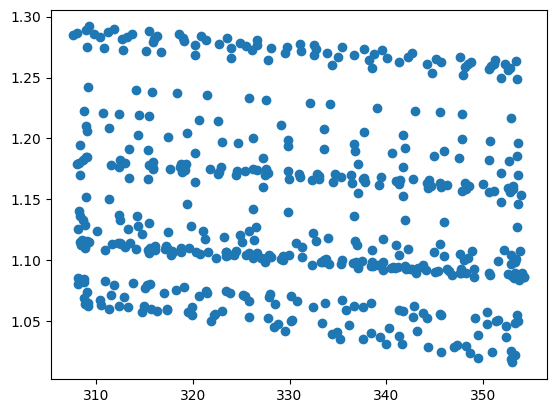

In [6]:
from matplotlib import pyplot as plt
temp=data.iloc[:,4]
density=data.iloc[:,5]
plt.scatter(temp,density)
plt.show()

In [7]:
train=data[['MR','T/K','MCI','ωm','MW']]
Y=data['Dexp']
train.head()
print(train.shape,Y.shape)

(494, 5) (494,)


In [8]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(train)
# Train = scaler.transform(train)

In [10]:
train

,MR,T/K,MCI,ωm,MW
0,1.2,308.57,1.7208,0.94,87.6648
1,1.2,312.56,1.7208,0.94,87.6648
2,1.2,313.52,1.7208,0.94,87.6648
3,1.2,317.27,1.7208,0.94,87.6648
4,1.2,319.62,1.7208,0.94,87.6648
...,...,...,...,...,...
489,1.5,336.14,8.4242,1.07,177.7200
490,1.5,340.21,8.4242,1.07,177.7200
491,1.5,343.16,8.4242,1.07,177.7200
492,1.5,349.41,8.4242,1.07,177.7200


In [11]:
Train=pd.DataFrame(train)
Train.shape

(494, 5)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
...     Train, Y, test_size=0.3, random_state=42,shuffle=True)

In [14]:
print(len(X_train),len(X_test),len(y_train),len(y_test))
print(Train.shape,X_test.shape)

345 149 345 149
(494, 5) (149, 5)


In [ ]:
# X_val,y_val,X_test,y_test=train_test_split(
# ...     X_test, y_test, test_size=0.1, random_state=42,shuffle=True)

In [ ]:
# print(len(Train))
# print(len(X_val),len(X_test),len(y_val),len(y_test))

494
134 134 15 15


In [15]:
import tensorflow as tf
import keras
from keras.layers import Dense,Dropout,BatchNormalization
from keras.activations import relu,linear
from keras.models import Sequential
from keras.optimizers import Adam,SGD
from keras.losses import MeanSquaredError
from keras.callbacks import ReduceLROnPlateau

In [17]:
model=Sequential()
model.add(Dense(256,activation='linear',input_shape=[5]))
model.add(BatchNormalization())
model.add(Dense(128,activation='linear'))
model.add(BatchNormalization())
model.add(Dense(64,activation='linear'))
model.add(BatchNormalization())
model.add(Dense(1,activation='linear'))

In [18]:
model.summary()
reduceLROnPlateau = ReduceLROnPlateau(monitor='accuracy', 
                                patience=3,
                                verbose=1, 
                                factor=0.5,
                                min_lr=0.00001)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               1536      
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_2 (Batc  (None, 64)               2

In [19]:
model.compile(loss='MeanSquaredError',optimizer='adam',metrics=['accuracy'])
#model.fit(X_train,y_train,batch_size=40,epochs=100,callbacks=[ReduceLROnPlateau])

history=model.fit(X_train,y_train, validation_data=[X_test, y_test], epochs=100, callbacks=[reduceLROnPlateau])

Epoch 1/100
11/11 [==============================] - 2s 23ms/step - loss: 1.6655 - accuracy: 0.0000e+00 - val_loss: 256.4142 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 2/100
11/11 [==============================] - 0s 5ms/step - loss: 0.9757 - accuracy: 0.0000e+00 - val_loss: 157.8842 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 3/100
11/11 [==============================] - 0s 6ms/step - loss: 0.7686 - accuracy: 0.0000e+00 - val_loss: 52.7937 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 4/100
 1/11 [=>............................] - ETA: 0s - loss: 0.6524 - accuracy: 0.0000e+00
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
11/11 [==============================] - 0s 5ms/step - loss: 0.5917 - accuracy: 0.0000e+00 - val_loss: 19.1740 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 5/100
11/11 [==============================] - 0s 5ms/step - loss: 0.4745 - accuracy: 0.0000e+00 - val_loss: 11.1875 - val_accuracy: 0.0000e+00 - lr: 5.0000e-04
Epoch 6/100
11/

In [28]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 345 entries, 16 to 102
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MR      345 non-null    float64
 1   T/K     345 non-null    float64
 2   MCI     345 non-null    float64
 3   ωm      345 non-null    float64
 4   MW      345 non-null    float64
dtypes: float64(5)
memory usage: 16.2 KB


In [29]:
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error
import numpy as np
pred = model.predict(X_test)
pred = np.array(pred)


print(pred.shape)
print(y_test.shape)
print("MAE : ",mean_absolute_error( pred,y_test))
print("MSE : ", mean_squared_error(pred,y_test))

5/5 [==============================] - 0s 4ms/step
(149, 1)
(149,)
MAE :  0.31582675720970105
MSE :  0.10446435298811332


In [34]:
pred=pred.flatten()
print(pred.shape,y_test.shape)
print(len(pred))
print(y_test.shape)
ytest=y_test.to_numpy()

(149,) (149,)
149
(149,)


In [35]:
# Mape
s=0
for i in range(len(pred)):
    s+=(abs(pred[i]-ytest[i])/ytest[i])
print(s/len(y_test)*100)  

27.489259756409574


<AxesSubplot:>

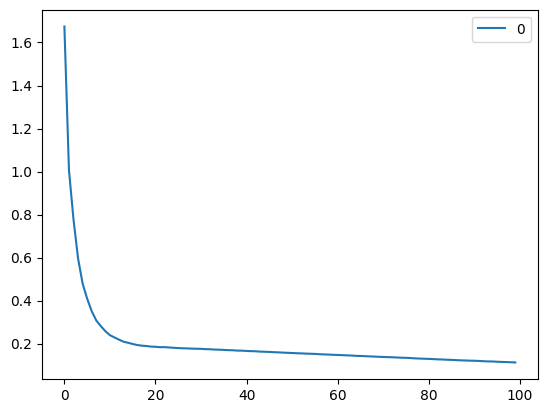

In [36]:
his = pd.DataFrame(history.history['loss'])
his.plot()

In [ ]:
# MAPE (hard code)
